#                                     Proyecto Seundo Bimestre

# Tema: Criptomonedas

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
path = ".\\proyectoFinal\\proyectoFinal\\tmp\\crypto.json"
llaves = ['Name','Market Capitalization','Price','Circulating Supply','Volume (24h)']
df = pd.read_json(
        path
    )
#df.set_index('name',inplace=True)

In [4]:
df.rename(columns={'market_cap': 'Market Capitalization',
                   'name': 'Crypto Currency',
                   'price': 'Price',
                   'supply': 'Circulating Supply',
                   'volume': 'Volume (24h)'}, inplace=True)

In [5]:
path_guardado = '.\\crypto_currency.pickle'
df.to_pickle(path_guardado)
df_pickle_guardado = pd.read_pickle(path_guardado)
df_pickle_guardado.sort_values(by=["Market Capitalization"], ascending=False)

,Market Capitalization,Crypto Currency,Price,Circulating Supply,Volume (24h)
0,169636960737,Bitcoin,9.505270e+03,17846625,13624098305
1,22330439978,Ethereum,2.084800e+02,107109279,5519276433
2,13256648109,XRP,3.092100e-01,42872646068,775299225
3,5634782017,Litecoin,8.960000e+01,62884718,2396702955
4,5491507996,Bitcoin Cash,3.064600e+02,17919400,1217366839
5,4158175699,Binance Coin,2.673000e+01,155536713,150687294
6,4018101527,Tether,9.976500e-01,4027564415,15072082453
7,3872217543,EOS,4.180000e+00,925328061,1604549279
8,2598747529,Bitcoin SV,1.455500e+02,17854986,327508343
9,1622515660,Stellar,8.270700e-02,19617690458,84941962


# Cantidad de Criptomonedas según promedio de capitalización

In [6]:
promedio=df["Market Capitalization"].mean()
promedio

220737954.33500838

In [7]:
MonCap = np.array([df_pickle_guardado['Crypto Currency'].get_values(), df_pickle_guardado['Market Capitalization'].get_values()])
Valores = [np.array(MonCap[0][np.where(MonCap[1] >promedio)]).size, np.array(MonCap[0][np.where(MonCap[1] <promedio)]).size]
Valores

[39, 1155]

In [8]:
arreglo = np.array(['Mayores al promedio', 'Menores al promedio'])
arreglo

array(['Mayores al promedio', 'Menores al promedio'], dtype='<U19')

In [10]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

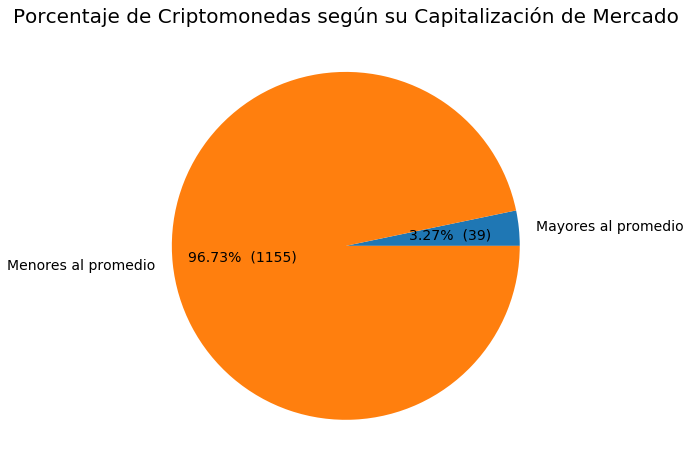

In [11]:
plt.figure(figsize=(8,8))
plt.pie(Valores, labels=arreglo, autopct=make_autopct(Valores), textprops={'fontsize': 14})
plt.title("Porcentaje de Criptomonedas según su Capitalización de Mercado", fontsize=20)
plt.show()

## Conclusiones
### 1) 

### 2) 

### 3) 

## Top 20 Criptomonedas según su Capitalización de Mercado

In [23]:
df2 = df.sort_values(by=["Market Capitalization"], ascending=False).nlargest(np.array(MonCap[0][np.where(MonCap[1] >promedio)]).size, "Market Capitalization")

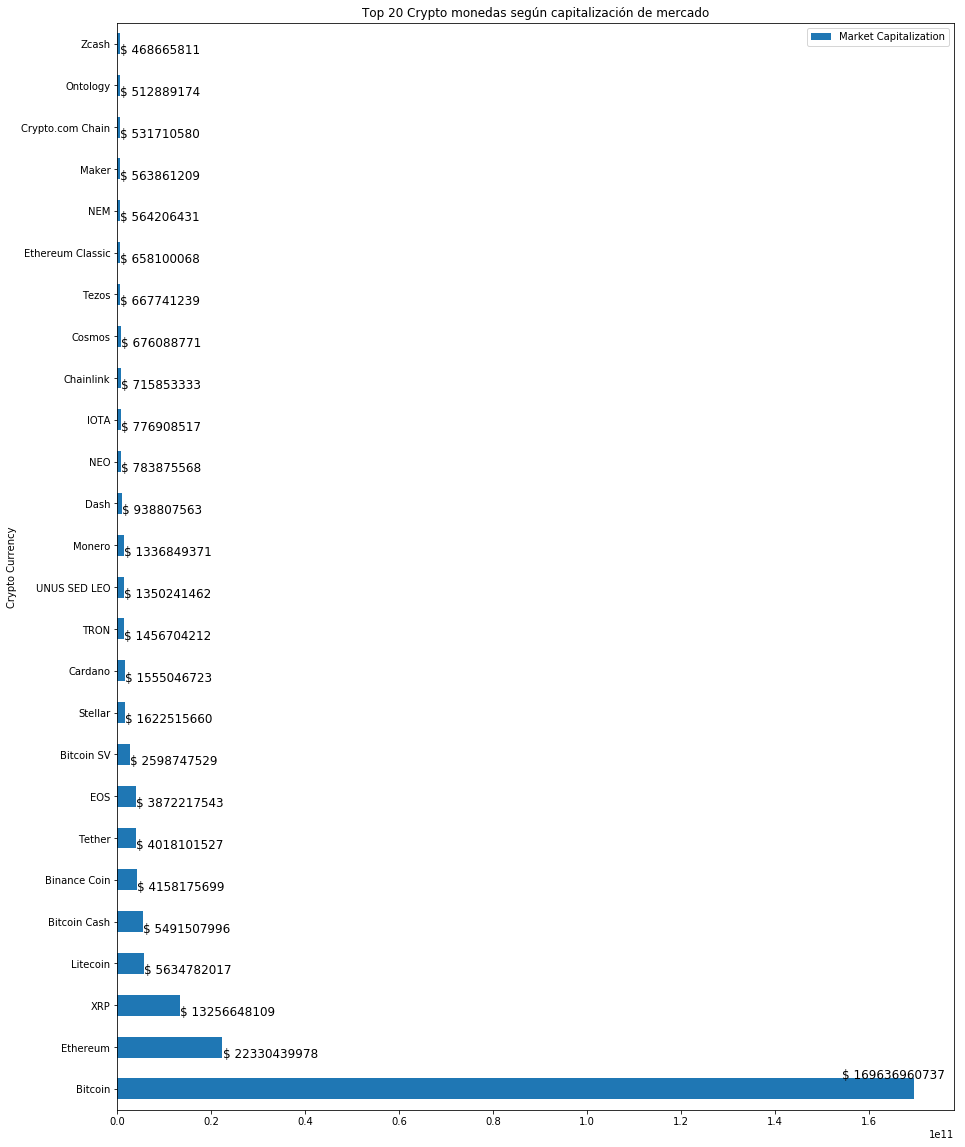

In [24]:
chart = df2.plot.barh(x = 'Crypto Currency', y='Market Capitalization', figsize=(15,20), title='Top 20 Crypto monedas según capitalización de mercado')
flag=True
for p in chart.patches:
    if (flag):
        chart.annotate('$ '+str(p.get_width()), (p.get_width()/1.1, p.get_y()+0.5), fontsize='large')
        flag = False
    else:
        chart.annotate('$ '+str(p.get_width()), (p.get_width()* 1.005, p.get_y()* 1.0005), fontsize='large')

## Conclusiones
### 1) 

### 2) 

### 3) 

## Cantidad de cripto monedas según Precio de Mercado

In [14]:
promedio=df["Price"].mean()
promedio

11.49834854304021

In [15]:
MonCap = np.array([df_pickle_guardado['Crypto Currency'].get_values(), df_pickle_guardado['Price'].get_values()])
Valores = [np.array(MonCap[0][np.where(MonCap[1] >promedio)]).size, np.array(MonCap[0][np.where(MonCap[1] <promedio)]).size]
Valores

[26, 1168]

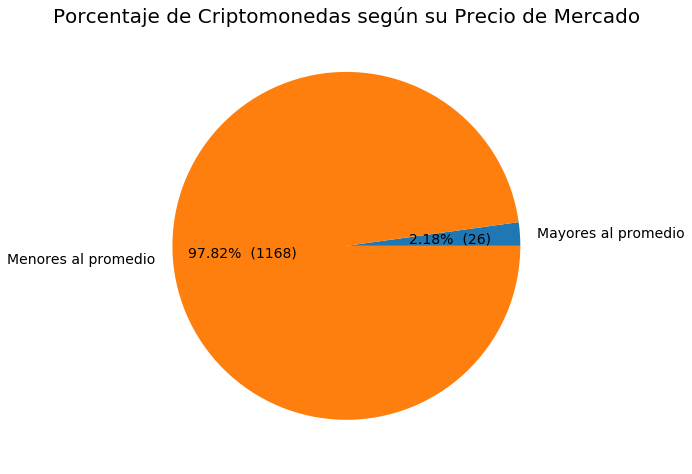

In [18]:
plt.figure(figsize=(8,8))
plt.pie(Valores, labels=arreglo, autopct=make_autopct(Valores), textprops={'fontsize': 14})
plt.title("Porcentaje de Criptomonedas según su Precio de Mercado", fontsize=20)
plt.show()

## Conclusiones
### 1) 

### 2) 

### 3)

## Top 20 Criptomonedas según su Precio de Mercado

In [25]:
df3 = df.sort_values(by=["Price"], ascending=False).nlargest(np.array(MonCap[0][np.where(MonCap[1] >promedio)]).size, "Price")

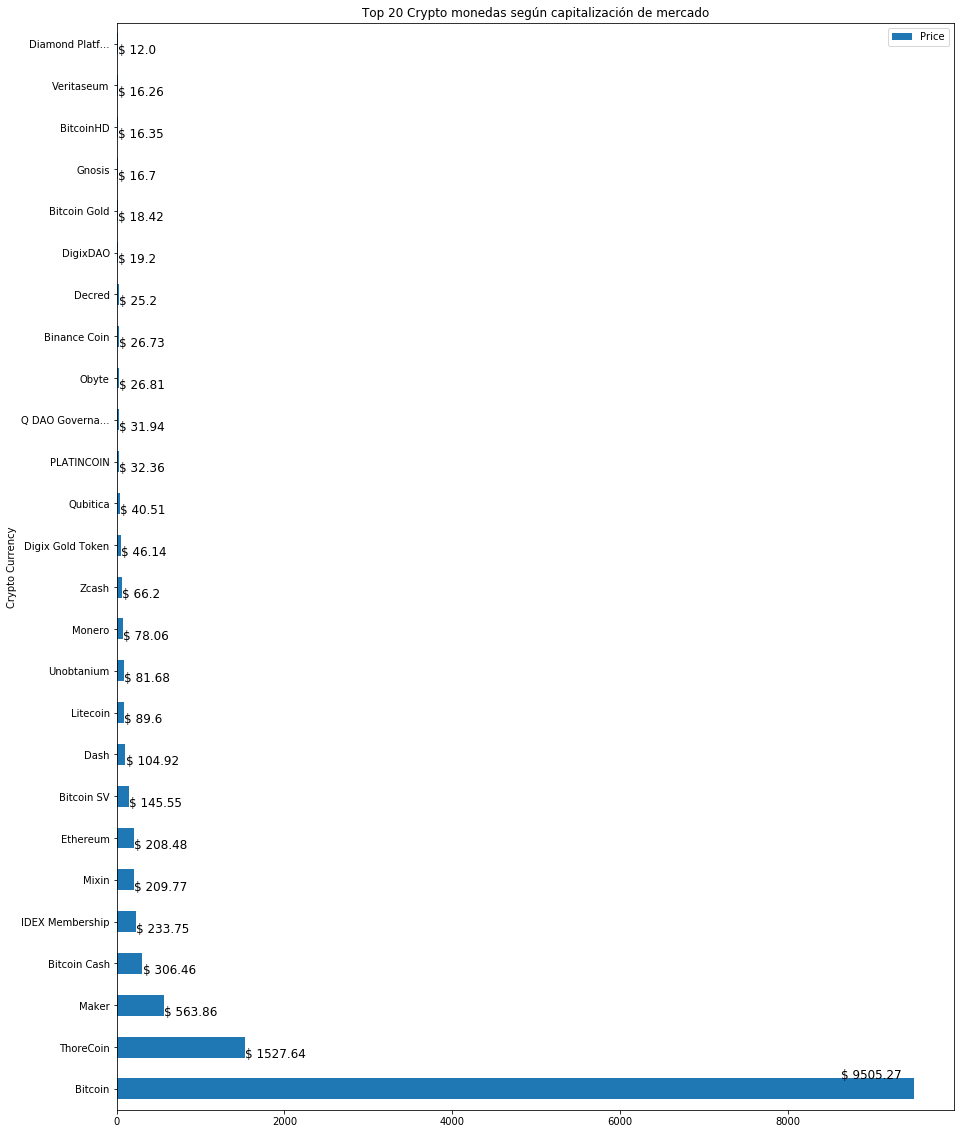

In [26]:
chart = df3.plot.barh(x = 'Crypto Currency', y='Price', figsize=(15,20), title='Top 20 Crypto monedas según capitalización de mercado')
flag=True
for p in chart.patches:
    if (flag):
        chart.annotate('$ '+str(p.get_width()), (p.get_width()/1.1, p.get_y()+0.5), fontsize='large')
        flag = False
    else:
        chart.annotate('$ '+str(p.get_width()), (p.get_width()* 1.005, p.get_y()* 1.0005), fontsize='large')

## Conclusiones
### 1) 

### 2) 

### 3)

## Cantidad de cripto monedas según el promedio de monedas en existencia

In [28]:
promedio=df["Circulating Supply"].mean()
promedio

34761306356.13233

In [29]:
MonCap = np.array([df_pickle_guardado['Crypto Currency'].get_values(), df_pickle_guardado['Circulating Supply'].get_values()])
Valores = [np.array(MonCap[0][np.where(MonCap[1] >promedio)]).size, np.array(MonCap[0][np.where(MonCap[1] <promedio)]).size]
Valores

[40, 1154]

In [274]:
df4 = df.sort_values(by=["Circulating Supply"], ascending=False).nlargest(20, "Circulating Supply")

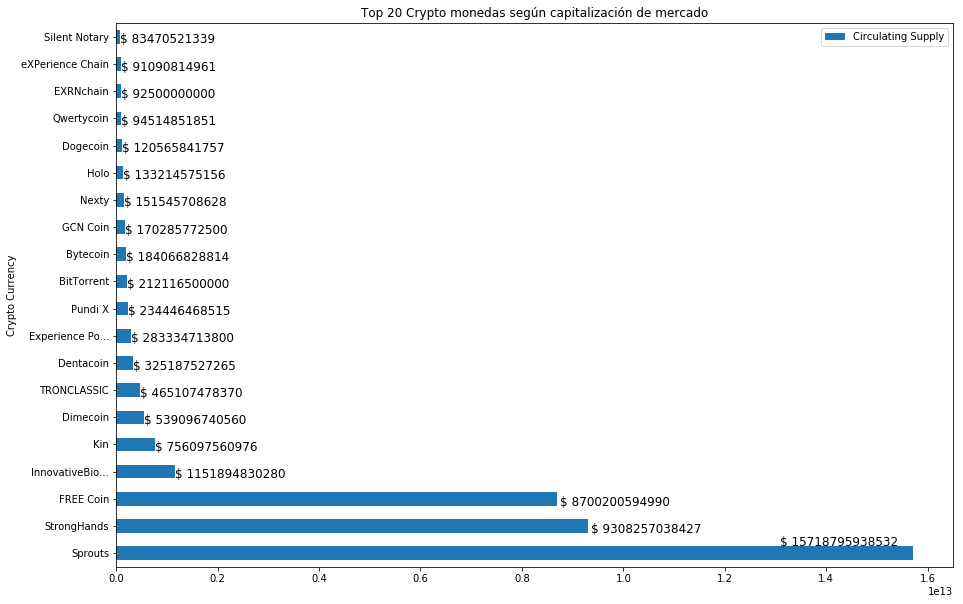

In [278]:
chart = df4.plot.barh(x = 'Crypto Currency', y='Circulating Supply', figsize=(15,10), title='Top 20 Crypto monedas según capitalización de mercado')
flag=True
for p in chart.patches:
    if (flag):
        chart.annotate(str(p.get_width()), (p.get_width()/1.2, p.get_y()+0.5), fontsize='large')
        flag = False
    else:
        chart.annotate(str(p.get_width()), (p.get_width()* 1.005, p.get_y()* 1.0005), fontsize='large')

## Conclusiones
### 1) Según el gráfico de barras, el tipo de crimen más significativo en la ciudad de Seattle es "CAR PROWL" (robo del contenido de vehículos estacionados), seguido por el "THEFT-ALL OTHER" (robo a transeuntes) y por "SHOPLIFT" (robo a tiendas). Esta información es relevante para el establecimiento de operativos acordes a estas necesidades por parte de los organimos de seguridad.

### 2) La misma información en los casos más relevantes se puede observar en le gráfico de pastel, con el cual se puede observar que en la ciudad de Seattle los crímenes de allanamiento y robo de propiedad privada son también significativos.

### 3) No obstante, es necesario expresar que crímenes como la prostitución, el homicidio y la pornografía no son significativos según los reportes del presente año en la ciudad de Seattle.

## Cantidad de crimenes ocurridos por precinto

In [276]:
df5 = df.sort_values(by=["Volume (24h)"], ascending=False).nlargest(20, "Volume (24h)")

0
1


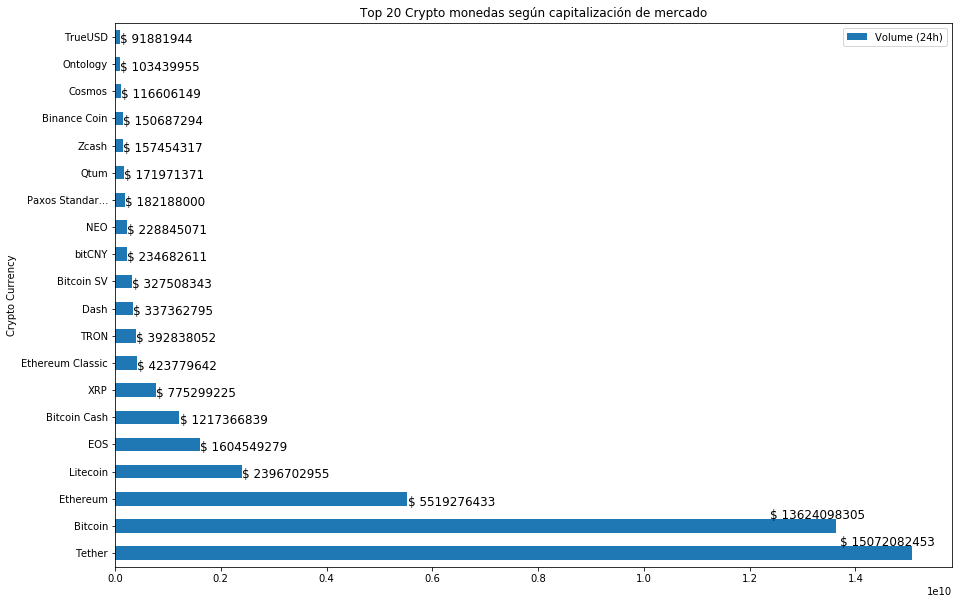

In [284]:
chart = df5.plot.barh(x = 'Crypto Currency', y='Volume (24h)', figsize=(15,10), title='Top 20 Crypto monedas según capitalización de mercado')
i=0
for p in chart.patches:
    if (i<2):
        chart.annotate('$ '+str(p.get_width()), (p.get_width()/1.1, p.get_y()+0.5), fontsize='large')
        print(i)
        i = i+1
    else:
        chart.annotate('$ '+str(p.get_width()), (p.get_width()* 1.005, p.get_y()* 1.0005), fontsize='large')

## Conclusiones
### 1) El gráfico muestra que el precinto (distrito) en el concentran más los crímenes de la ciudad es el norte, seguido por el Oeste, mientras el menor distrito conocido es el sur-oeste. Esta información resulta interesante para sectorizar la vigilancia y seguridad de la ciudad por parte de los orgnaismos policiales.

### 2) Es importante determinar que los datos de no ubicados son insignificantes, lo que nos indica un adecuado control de la sectorización y ubicación geográfica de los crímenes en la ciudad.